In [39]:
import os
import time
import requests
import openslide
import numpy as np
import matplotlib.pyplot as plt

from model import ProstateInferencer

model = ProstateInferencer()



/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.21.3 when using version 0.22rc2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [40]:
files = os.listdir('data')
files

['007433133235efc27a39f11df6940829.tiff',
 '0018ae58b01bdadc8e347995b69f99aa.tiff',
 '00951a7fad040bf7e90f32e81fc0746f.tiff']

In [41]:
path = 'data/{}'.format(files[1])

slide = openslide.OpenSlide(path)

In [42]:
result = model.predict(slide)

/app/model.py:186: RuntimeWarning: invalid value encountered in power
  (embeddings ** 3).sum(axis=0)**(1/3),


In [43]:
result

{'isup': 4,
 'probas': [0.0003977329721967318,
  0.0007686594381431462,
  0.0007540342853484922,
  0.0012422774350329291,
  0.9902885010218029,
  0.0065487948474758405],
 'crops_info': [{'x': 20480, 'y': 2560, 'expectation': 4.640521751483902},
  {'x': 5632, 'y': 512, 'expectation': 4.535147136077285},
  {'x': 24064, 'y': 4608, 'expectation': 4.520823237951845},
  {'x': 12288, 'y': 1024, 'expectation': 4.480055200379866},
  {'x': 20480, 'y': 3072, 'expectation': 4.455981716513634},
  {'x': 4096, 'y': 1024, 'expectation': 4.324668150395155},
  {'x': 16384, 'y': 2048, 'expectation': 4.316535621495859},
  {'x': 13312, 'y': 1024, 'expectation': 4.297397515591001},
  {'x': 17408, 'y': 2048, 'expectation': 4.218309917487204},
  {'x': 14336, 'y': 2560, 'expectation': 4.205145332743996},
  {'x': 7168, 'y': 512, 'expectation': 4.17186848440906},
  {'x': 11776, 'y': 512, 'expectation': 4.171464467424812},
  {'x': 15872, 'y': 2048, 'expectation': 4.134951589865523},
  {'x': 19968, 'y': 3072, 'exp

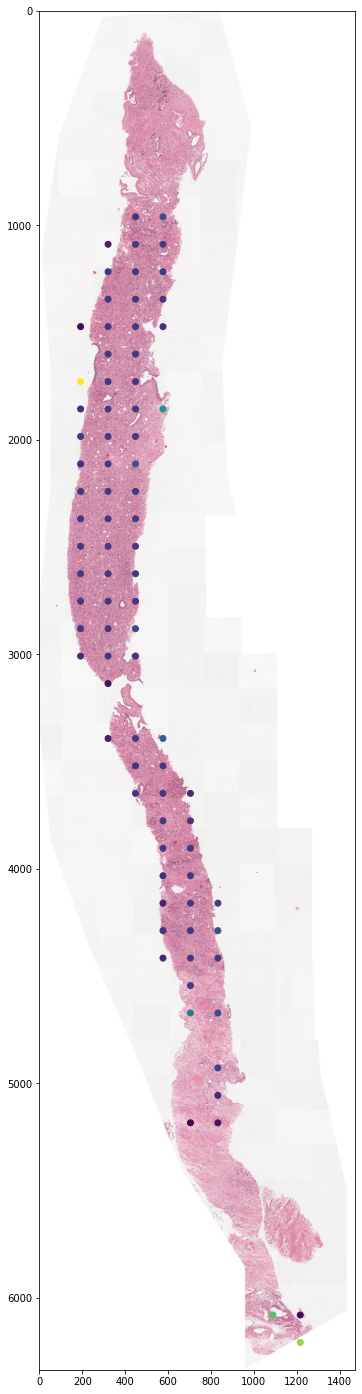

In [45]:
h, w = slide.level_dimensions[0]
h_, w_ = slide.level_dimensions[1]
scale = h_ / h

x = [(point['x'] + 256) * scale for point in result['crops_info']]
y = [(point['y'] + 256) * scale for point in result['crops_info']]
exp = [6 - point['expectation'] for point in result['crops_info']]
img = np.array(slide.read_region((0, 0), 1, (h_, w_)))


plt.figure(figsize=(25, 25))
plt.imshow(img)
plt.scatter(y, x, c=exp)
plt.show()